In [0]:
# https://www.datacamp.com/courses/manipulating-dataframes-with-pandas

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.stats import zscore

## 1. Extracting and transforming data

#### Indexing DataFrames

In [0]:
election = pd.read_csv('pennsylvania2012_turnout.csv', index_col=0)
election.shape # 67

(67, 8)

In [0]:
election.head()

,state,total,Obama,Romney,winner,voters,turnout,margin
county,,,,,,,,
Adams,PA,41973,35.482334,63.112001,Romney,61156,68.632677,27.629667
Allegheny,PA,614671,56.640219,42.185820,Obama,924351,66.497575,14.454399
Armstrong,PA,28322,30.696985,67.901278,Romney,42147,67.198140,37.204293
Beaver,PA,80015,46.032619,52.637630,Romney,115157,69.483401,6.605012
Bedford,PA,21444,22.057452,76.986570,Romney,32189,66.619031,54.929118


In [0]:
# Assign the row position of election.loc['Bedford']: x
x = 4

In [0]:
# Assign the column position of election['winner']: y
y = 4

In [0]:
# Print the boolean equivalence
print(election.iloc[x, y] == election.loc['Bedford', 'winner'])

True


In [0]:
import pandas as pd

In [0]:
filename = 'https://s3.amazonaws.com/assets.datacamp.com/production/course_1650/datasets/pennsylvania2012.csv'

In [0]:
# Read in filename and set the index: election
election = pd.read_csv(filename, index_col='county')

In [0]:
# Create a separate dataframe with the columns ['winner', 'total', 'voters']: results
results = election[['winner', 'total', 'voters']]

# Print the output of results.head()
print(results.head())

           winner   total  voters
county                           
Adams      Romney   41973   61156
Allegheny   Obama  614671  924351
Armstrong  Romney   28322   42147
Beaver     Romney   80015  115157
Bedford    Romney   21444   32189


#### Slicing DataFrames

In [0]:
# Slice the row labels 'Perry' to 'Potter': p_counties
p_counties = election.loc['Perry':'Potter':,]

In [0]:
# Print the p_counties DataFrame
print(p_counties)

             state   total      Obama     Romney  winner   voters
county                                                           
Perry           PA   18240  29.769737  68.591009  Romney    27245
Philadelphia    PA  653598  85.224251  14.051451   Obama  1099197
Pike            PA   23164  43.904334  54.882576  Romney    41840
Potter          PA    7205  26.259542  72.158223  Romney    10913


In [0]:
# Slice the row labels 'Potter' to 'Perry' in reverse order: p_counties_rev
p_counties_rev = election.loc['Potter':'Perry':-1]

In [0]:
# Print the p_counties_rev DataFrame
print(p_counties_rev)

             state   total      Obama     Romney  winner   voters
county                                                           
Potter          PA    7205  26.259542  72.158223  Romney    10913
Pike            PA   23164  43.904334  54.882576  Romney    41840
Philadelphia    PA  653598  85.224251  14.051451   Obama  1099197
Perry           PA   18240  29.769737  68.591009  Romney    27245


In [0]:
# Slice the columns from the starting column to 'Obama': left_columns
left_columns = election.loc[:, :'Obama']

In [0]:
# Print the output of left_columns.head()
print(left_columns.head())

          state   total      Obama
county                            
Adams        PA   41973  35.482334
Allegheny    PA  614671  56.640219
Armstrong    PA   28322  30.696985
Beaver       PA   80015  46.032619
Bedford      PA   21444  22.057452


In [0]:
# Slice the columns from 'Obama' to 'winner': middle_columns
middle_columns = election.loc[:, 'Obama':'winner']

In [0]:
# Print the output of middle_columns.head()
print(middle_columns.head())

               Obama     Romney  winner
county                                 
Adams      35.482334  63.112001  Romney
Allegheny  56.640219  42.185820   Obama
Armstrong  30.696985  67.901278  Romney
Beaver     46.032619  52.637630  Romney
Bedford    22.057452  76.986570  Romney


In [0]:
# Slice the columns from 'Romney' to the end: 'right_columns'
right_columns = election.loc[:, 'Romney':]

In [0]:
# Print the output of right_columns.head()
print(right_columns.head())

              Romney  winner  voters
county                              
Adams      63.112001  Romney   61156
Allegheny  42.185820   Obama  924351
Armstrong  67.901278  Romney   42147
Beaver     52.637630  Romney  115157
Bedford    76.986570  Romney   32189


In [0]:
# Create the list of row labels: rows
rows = ['Philadelphia', 'Centre', 'Fulton']

In [0]:
# Create the list of column labels: cols
cols = ['winner', 'Obama', 'Romney']

In [0]:
# Create the new DataFrame: three_counties
three_counties = election.loc[rows, cols]

In [0]:
# Print the three_counties DataFrame
print(three_counties)

              winner      Obama     Romney
county                                    
Philadelphia   Obama  85.224251  14.051451
Centre        Romney  48.948416  48.977486
Fulton        Romney  21.096291  77.748861


#### Flitering DataFrames

In [0]:
election = pd.read_csv('pennsylvania2012_turnout.csv', index_col=0)
election.shape # 67

(67, 8)

In [0]:
# Create the boolean array: high_turnout
high_turnout = election['turnout'] > 70

In [0]:
# Filter the election DataFrame with the high_turnout array: high_turnout_df
high_turnout_df = election.loc[high_turnout]

In [0]:
# Print the high_turnout_results DataFrame
print(high_turnout_df)

             state   total      Obama  ...  voters    turnout     margin
county                                 ...                              
Bucks           PA  319407  49.966970  ...  435606  73.324748   1.165284
Butler          PA   88924  31.920516  ...  122762  72.436096  34.896091
Chester         PA  248295  49.228539  ...  337822  73.498766   0.422079
Forest          PA    2308  38.734835  ...    3232  71.410891  21.100520
Franklin        PA   62802  30.110506  ...   87406  71.850903  38.473297
Montgomery      PA  401787  56.637223  ...  551105  72.905708  14.350390
Westmoreland    PA  168709  37.567646  ...  238006  70.884347  23.738508

[7 rows x 8 columns]


In [0]:
# Import numpy
import numpy as np

In [0]:
# Create the boolean array: too_close
too_close = election['margin'] < 1

In [0]:
# Assign np.nan to the 'winner' column where the results were too close to call
election.loc[too_close, 'winner'] = np.nan

In [0]:
# Print the output of election.info()
print(election.info())

<class 'pandas.core.frame.DataFrame'>
Index: 67 entries, Adams to York
Data columns (total 8 columns):
state      67 non-null object
total      67 non-null int64
Obama      67 non-null float64
Romney     67 non-null float64
winner     64 non-null object
voters     67 non-null int64
turnout    67 non-null float64
margin     67 non-null float64
dtypes: float64(4), int64(2), object(2)
memory usage: 7.2+ KB
None


**Filtering using NaNs**

In certain scenarios, it may be necessary to remove rows and columns with missing data from a DataFrame. The .dropna() method is used to perform this action. You'll now practice using this method on a dataset obtained from Vanderbilt University, which consists of data from passengers on the Titanic.

You'll also use the .shape attribute, which returns the number of rows and columns in a tuple from a DataFrame, or the number of rows from a Series, to see the effect of dropping missing values from a DataFrame.

Finally, you'll use the thresh= keyword argument to drop columns from the full dataset that have less than 1000 non-missing values.

In [0]:
titanic = pd.read_csv('titanic.csv')
titanic.head(5)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [0]:
titanic.shape # (1309, 14)

(1309, 14)

In [0]:
# Select the 'age' and 'cabin' columns: df
df = titanic[['age','cabin']]

In [0]:
# Print the shape of df
print(df.shape)

(1309, 2)


In [0]:
# Drop rows in df with how='any' and print the shape
print(df.dropna(how='any').shape)

(272, 2)


In [0]:
# Drop rows in df with how='all' and print the shape
print(df.dropna(how='all').shape)

(1069, 2)


In [0]:
# Drop columns in titanic with more than 1000 missing values
print(titanic.dropna(thresh=1000, axis='columns').info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 10 columns):
pclass      1309 non-null int64
survived    1309 non-null int64
name        1309 non-null object
sex         1309 non-null object
age         1046 non-null float64
sibsp       1309 non-null int64
parch       1309 non-null int64
ticket      1309 non-null object
fare        1308 non-null float64
embarked    1307 non-null object
dtypes: float64(2), int64(4), object(4)
memory usage: 102.3+ KB
None


#### Transforming DataFrames

**Using apply() to transform a column**

The .apply() method can be used on a pandas DataFrame to apply an arbitrary Python function to every element. 

In [0]:
weather = pd.read_csv('pittsburgh2013.csv')
weather.shape

(365, 23)

In [0]:
# Write a function to convert degrees Fahrenheit to degrees Celsius: to_celsius
def to_celsius(F):
    return 5/9*(F - 32)

In [0]:
# Apply the function over 'Mean TemperatureF' and 'Mean Dew PointF': df_celsius
df_celsius = weather[['Mean TemperatureF', 'Mean Dew PointF']].apply(to_celsius)

In [0]:
# Reassign the columns df_celsius
df_celsius.columns = ['Mean TemperatureC', 'Mean Dew PointC']

In [0]:
# Print the output of df_celsius.head()
print(df_celsius.head())

   Mean TemperatureC  Mean Dew PointC
0          -2.222222        -2.777778
1          -6.111111       -11.111111
2          -4.444444        -9.444444
3          -2.222222        -7.222222
4          -1.111111        -6.666667


**Using .map() with a dictionary**

The .map() method is used to transform values according to a Python dictionary look-up. 

In [0]:
election = pd.read_csv('pennsylvania2012_turnout.csv', index_col=0)
election.shape # 67

(67, 8)

In [0]:
# Create the dictionary: red_vs_blue
red_vs_blue = {'Obama':'blue', 'Romney':'red'}

In [0]:
# Use the dictionary to map the 'winner' column to the new column: election['color']
election['color'] = election['winner'].map(red_vs_blue)

In [0]:
# Print the output of election.head()
print(election.head())

          state   total      Obama  ...    turnout     margin  color
county                              ...                             
Adams        PA   41973  35.482334  ...  68.632677  27.629667    red
Allegheny    PA  614671  56.640219  ...  66.497575  14.454399   blue
Armstrong    PA   28322  30.696985  ...  67.198140  37.204293    red
Beaver       PA   80015  46.032619  ...  69.483401   6.605012    red
Bedford      PA   21444  22.057452  ...  66.619031  54.929118    red

[5 rows x 9 columns]


**Using vectorized functions**

When performance is paramount, you should avoid using .apply() and .map() because those constructs perform Python for-loops over the data stored in a pandas Series or DataFrame. 

By using vectorized functions instead, you can loop over the data at the same speed as compiled code (C, Fortran, etc.)!

Instead of using .apply() as you did in the earlier exercises, the zscore UFunc will take a pandas Series as input and return a NumPy array. 

In [0]:
# Import zscore from scipy.stats
from scipy.stats import zscore

In [0]:
# Call zscore with election['turnout'] as input: turnout_zscore
turnout_zscore = zscore(election['turnout'])

In [0]:
# Print the type of turnout_zscore
print(type(turnout_zscore))

<class 'numpy.ndarray'>


In [0]:
# Assign turnout_zscore to a new column: election['turnout_zscore']
election['turnout_zscore'] = turnout_zscore

In [0]:
# Print the output of election.head()
print(election.head())

          state   total      Obama  ...     margin color  turnout_zscore
county                              ...                                 
Adams        PA   41973  35.482334  ...  27.629667   red        0.853734
Allegheny    PA  614671  56.640219  ...  14.454399  blue        0.439846
Armstrong    PA   28322  30.696985  ...  37.204293   red        0.575650
Beaver       PA   80015  46.032619  ...   6.605012   red        1.018647
Bedford      PA   21444  22.057452  ...  54.929118   red        0.463391

[5 rows x 10 columns]


## 2. Advanced indexing

#### Index objects and labeled data

In [0]:
sales = pd.read_csv('sales.csv', index_col=0)
sales

,eggs,salt,spam
month,,,
Jan,47,12.0,17
Feb,110,50.0,31
Mar,221,89.0,72
Apr,77,87.0,20
May,132,NaN,52
Jun,205,60.0,55


In [0]:
range(len(sales))

range(0, 6)

In [0]:
sales.index

Index(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun'], dtype='object', name='month')

In [0]:
# Create the list of new indexes: new_idx
new_idx = [sales.upper() for sales in sales.index]

In [0]:
new_idx

['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN']

In [0]:
# Assign new_idx to sales.index
sales.index = new_idx

In [0]:
# Print the sales DataFrame
print(sales)

     eggs  salt  spam
JAN    47  12.0    17
FEB   110  50.0    31
MAR   221  89.0    72
APR    77  87.0    20
MAY   132   NaN    52
JUN   205  60.0    55


In [0]:
# Assign the string 'MONTHS' to sales.index.name
sales.index.name = 'MONTHS'

In [0]:
# Print the sales DataFrame
print(sales)

        eggs  salt  spam
MONTHS                  
JAN       47  12.0    17
FEB      110  50.0    31
MAR      221  89.0    72
APR       77  87.0    20
MAY      132   NaN    52
JUN      205  60.0    55


In [0]:
# Assign the string 'PRODUCTS' to sales.columns.name 
sales.columns.name = 'PRODUCTS'

In [0]:
# Print the sales dataframe again
print(sales)

PRODUCTS  eggs  salt  spam
MONTHS                    
JAN         47  12.0    17
FEB        110  50.0    31
MAR        221  89.0    72
APR         77  87.0    20
MAY        132   NaN    52
JUN        205  60.0    55


In [0]:
# recover df
sales = pd.read_csv('sales.csv', index_col=0)
sales.index = range(0, 6)
sales

,eggs,salt,spam
0,47,12.0,17
1,110,50.0,31
2,221,89.0,72
3,77,87.0,20
4,132,NaN,52
5,205,60.0,55


In [0]:
# Generate the list of months: months
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun']

In [0]:
# Assign months to sales.index
sales.index = months

In [0]:
# Print the modified sales DataFrame
print(sales)

     eggs  salt  spam
Jan    47  12.0    17
Feb   110  50.0    31
Mar   221  89.0    72
Apr    77  87.0    20
May   132   NaN    52
Jun   205  60.0    55


#### Hierarchical indexing

In [0]:
# match dataset (created below)
sales_h

eggs  salt  spam
state month                  
CA    1        47  12.0    17
      2       110  50.0    31
NY    1       221  89.0    72
      2        77  87.0    20
TX    1       132   NaN    52
      2       205  60.0    55

In [0]:
# Print sales.loc[['CA', 'TX']]
print(sales.loc[['CA', 'TX']])

             eggs  salt  spam
state month                  
CA    1        47  12.0    17
      2       110  50.0    31
TX    1       132   NaN    52
      2       205  60.0    55


In [0]:
# Print sales['CA':'TX']
print(sales['CA':'TX'])

             eggs  salt  spam
state month                  
CA    1        47  12.0    17
      2       110  50.0    31
NY    1       221  89.0    72
      2        77  87.0    20
TX    1       132   NaN    52
      2       205  60.0    55


**Setting & sorting a MultiIndex**

In [0]:
# recover df
sales = pd.read_csv('sales.csv', index_col=0)
sales.index = range(0, 6)
sales['state'] = ['CA', 'CA', 'NY', 'NY', 'TX', 'TX']
sales['month'] = [1, 2, 1, 2, 1, 2]
sales = sales.reindex(['state', 'month', 'eggs', 'salt', 'spam'], axis=1)
sales

,state,month,eggs,salt,spam
0,CA,1,47,12.0,17
1,CA,2,110,50.0,31
2,NY,1,221,89.0,72
3,NY,2,77,87.0,20
4,TX,1,132,NaN,52
5,TX,2,205,60.0,55


In [0]:
# Set the index to be the columns ['state', 'month']: sales
sales = sales.set_index(['state', 'month'])

In [0]:
# Sort the MultiIndex: sales
sales = sales.sort_index()

In [0]:
# Print the sales DataFrame
print(sales)

             eggs  salt  spam
state month                  
CA    1        47  12.0    17
      2       110  50.0    31
NY    1       221  89.0    72
      2        77  87.0    20
TX    1       132   NaN    52
      2       205  60.0    55


In [0]:
sales_h = sales
sales_h

eggs  salt  spam
state month                  
CA    1        47  12.0    17
      2       110  50.0    31
NY    1       221  89.0    72
      2        77  87.0    20
TX    1       132   NaN    52
      2       205  60.0    55

**Using .loc[] with nonunique indexes**

In [0]:
# recover df
sales = pd.read_csv('sales.csv', index_col=0)
sales.index = range(0, 6)
sales['state'] = ['CA', 'CA', 'NY', 'NY', 'TX', 'TX']
sales['month'] = [1, 2, 1, 2, 1, 2]
sales = sales.reindex(['state', 'month', 'eggs', 'salt', 'spam'], axis=1)
sales

,state,month,eggs,salt,spam
0,CA,1,47,12.0,17
1,CA,2,110,50.0,31
2,NY,1,221,89.0,72
3,NY,2,77,87.0,20
4,TX,1,132,NaN,52
5,TX,2,205,60.0,55


In [0]:
# Set the index to the column 'state': sales
sales = sales.set_index(['state'])

In [0]:
# Print the sales DataFrame
print(sales)

       month  eggs  salt  spam
state                         
CA         1    47  12.0    17
CA         2   110  50.0    31
NY         1   221  89.0    72
NY         2    77  87.0    20
TX         1   132   NaN    52
TX         2   205  60.0    55


In [0]:
# Access the data from 'NY'
print(sales.loc['NY'])

       month  eggs  salt  spam
state                         
NY         1   221  89.0    72
NY         2    77  87.0    20


**Indexing multiple levels of a MultiIndex**

Looking up data based on inner levels of a MultiIndex can be a bit trickier. In this exercise, you will use your sales DataFrame to do some increasingly complex lookups.

The trickiest of all these lookups are when you want to access some inner levels of the index. In this case, you need to use slice(None) in the slicing parameter for the outermost dimension(s) instead of the usual :, or use pd.IndexSlice. 


In [0]:
# retrieve hierarchical dataframe
sales_h

eggs  salt  spam
state month                  
CA    1        47  12.0    17
      2       110  50.0    31
NY    1       221  89.0    72
      2        77  87.0    20
TX    1       132   NaN    52
      2       205  60.0    55

In [0]:
sales = sales_h

In [0]:
# Look up data for NY in month 1: NY_month1
NY_month1 = sales.loc[('NY', 1), :]

In [0]:
# Look up data for CA and TX in month 2: CA_TX_month2
CA_TX_month2 = sales.loc[(['CA', 'TX'], 2), :]

## 3. Rearranging and reshaping data

#### Pivoting DataFrames

**Pivoting a single variable**

In [0]:
users = pd.read_csv('users.csv', index_col=0)
users.head(5)

,weekday,city,visitors,signups
0,Sun,Austin,139,7
1,Sun,Dallas,237,12
2,Mon,Austin,326,3
3,Mon,Dallas,456,5


In [0]:
# Pivot the users DataFrame: visitors_pivot
visitors_pivot = users.pivot(index='weekday',columns='city',values ='visitors')

In [0]:
# Print the pivoted DataFrame
print(visitors_pivot)

city     Austin  Dallas
weekday                
Mon         326     456
Sun         139     237


**Pivoting all variables**

If you do not select any particular variables, all of them will be pivoted. In this case - with the users DataFrame - both 'visitors' and 'signups' will be pivoted, creating hierarchical column labels.

In [0]:
# Pivot users with signups indexed by weekday and city: signups_pivot
signups_pivot = users.pivot(index='weekday',columns='city',values='signups')

In [0]:
# Print signups_pivot
print(signups_pivot)

city     Austin  Dallas
weekday                
Mon           3       5
Sun           7      12


In [0]:
# Pivot users pivoted by both signups and visitors: pivot
pivot = users.pivot(index='weekday',columns='city') 

In [0]:
# Print the pivoted DataFrame
print(pivot)

        visitors        signups       
city      Austin Dallas  Austin Dallas
weekday                               
Mon          326    456       3      5
Sun          139    237       7     12


#### Stacking & unstacking DataFrames

In [0]:
users

,weekday,city,visitors,signups
0,Sun,Austin,139,7
1,Sun,Dallas,237,12
2,Mon,Austin,326,3
3,Mon,Dallas,456,5


In [0]:
# change to hierarchical df
users_h = users.set_index(['city', 'weekday'])
users_h = users_h.sort_index()
users_h

visitors  signups
city   weekday                   
Austin Mon           326        3
       Sun           139        7
Dallas Mon           456        5
       Sun           237       12

In [0]:
# replace df
users = users_h

In [0]:
# Unstack users by 'weekday': byweekday
byweekday = users.unstack(level='weekday')

In [0]:
type(byweekday)

pandas.core.frame.DataFrame

In [0]:
# Print the byweekday DataFrame
print(byweekday)

        visitors      signups    
weekday      Mon  Sun     Mon Sun
city                             
Austin       326  139       3   7
Dallas       456  237       5  12


In [0]:
# Stack byweekday by 'weekday' and print it
print(byweekday.stack(level='weekday'))

                visitors  signups
city   weekday                   
Austin Mon           326        3
       Sun           139        7
Dallas Mon           456        5
       Sun           237       12


In [0]:
users

visitors  signups
city   weekday                   
Austin Mon           326        3
       Sun           139        7
Dallas Mon           456        5
       Sun           237       12

In [0]:
# Unstack users by 'city': bycity
bycity = users.unstack(level='city')

In [0]:
# Print the bycity DataFrame
print(bycity)

        visitors        signups       
city      Austin Dallas  Austin Dallas
weekday                               
Mon          326    456       3      5
Sun          139    237       7     12


In [0]:
# Stack bycity by 'city' and print it
print(bycity.stack(level='city'))

                visitors  signups
weekday city                     
Mon     Austin       326        3
        Dallas       456        5
Sun     Austin       139        7
        Dallas       237       12


**Restoring the index order**

Continuing from the previous exercise, you will now use .swaplevel(0, 1) to flip the index levels. 

Note they won't be sorted. To sort them, you will have to follow up with a .sort_index(). 

In [0]:
bycity

visitors        signups       
city      Austin Dallas  Austin Dallas
weekday                               
Mon          326    456       3      5
Sun          139    237       7     12

In [0]:
# match dataset
users = byweekday.stack(level='weekday')
users

visitors  signups
city   weekday                   
Austin Mon           326        3
       Sun           139        7
Dallas Mon           456        5
       Sun           237       12



*   Define a DataFrame newusers with the 'city' level stacked back into the index of bycity.
*   Swap the levels of the index of newusers.List item



*   Print newusers and verify that the index is not sorted. This has been done for you.
*   Sort the index of newusers.



*   Print newusers and verify that the index is now sorted. This has been done for you.
*   Assert that newusers equals users. This has been done for you, so hit 'Submit Answer' to see the result.





In [0]:
# Stack 'city' back into the index of bycity: newusers
newusers =  bycity.stack(level='city')

In [0]:
# Print newusers and verify that the index is not sorted
print(newusers)

                visitors  signups
weekday city                     
Mon     Austin       326        3
        Dallas       456        5
Sun     Austin       139        7
        Dallas       237       12


In [0]:
# Swap the levels of the index of newusers: newusers
newusers = newusers.swaplevel(0, 1)

In [0]:
# Print newusers and verify that the index is not sorted
print(newusers)

                visitors  signups
city   weekday                   
Austin Mon           326        3
Dallas Mon           456        5
Austin Sun           139        7
Dallas Sun           237       12


In [0]:
# Sort the index of newusers: newusers
newusers = newusers.sort_index()

In [0]:
# Print newusers and verify that the index is now sorted
print(newusers)

                visitors  signups
city   weekday                   
Austin Mon           326        3
       Sun           139        7
Dallas Mon           456        5
       Sun           237       12


In [0]:
# Verify that the new DataFrame is equal to the original
print(newusers.equals(users))

True


#### Melting DataFrames

In [0]:
# recover df
users = pd.read_csv('users.csv', index_col=0)
users

,weekday,city,visitors,signups
0,Sun,Austin,139,7
1,Sun,Dallas,237,12
2,Mon,Austin,326,3
3,Mon,Dallas,456,5


In [0]:
temp = users.pivot(index='weekday',columns='city',values ='visitors')
temp

city,Austin,Dallas
weekday,,
Mon,326,456
Sun,139,237


In [0]:
# match dataset
visitors_by_city_weekday = temp

**Adding names for readability**

Recall from the video that the goal of melting is to restore a pivoted DataFrame to its original form, or to change it from a wide shape to a long shape. 


In [0]:
# Reset the index: visitors_by_city_weekday
visitors_by_city_weekday = visitors_by_city_weekday.reset_index() 

In [0]:
# Print visitors_by_city_weekday
print(visitors_by_city_weekday)

city weekday  Austin  Dallas
0        Mon     326     456
1        Sun     139     237


In [0]:
# Melt visitors_by_city_weekday: visitors
visitors = pd.melt(visitors_by_city_weekday, id_vars=['weekday'], value_name='visitors')

In [0]:
# Print visitors
print(visitors)

  weekday    city  visitors
0     Mon  Austin       326
1     Sun  Austin       139
2     Mon  Dallas       456
3     Sun  Dallas       237


In [0]:
# recover df
users = pd.read_csv('users.csv', index_col=0)
users

,weekday,city,visitors,signups
0,Sun,Austin,139,7
1,Sun,Dallas,237,12
2,Mon,Austin,326,3
3,Mon,Dallas,456,5


In [0]:
# Melt users: skinny
skinny = pd.melt(users, id_vars=['weekday' ,'city'])

In [0]:
# Print skinny
print(skinny)

  weekday    city  variable  value
0     Sun  Austin  visitors    139
1     Sun  Dallas  visitors    237
2     Mon  Austin  visitors    326
3     Mon  Dallas  visitors    456
4     Sun  Austin   signups      7
5     Sun  Dallas   signups     12
6     Mon  Austin   signups      3
7     Mon  Dallas   signups      5


**Obtaining key-value pairs with melt()**



*   Set the index of users to ['city', 'weekday'].

*   Print the DataFrame users_idx to see the new index.
*   Obtain the key-value pairs corresponding to visitors and signups by melting users_idx with the keyword argument col_level=0.



In [0]:
# Set the new index: users_idx
users_idx = users.set_index(['city', 'weekday'])

In [0]:
# Print the users_idx DataFrame
print(users_idx)

                visitors  signups
city   weekday                   
Austin Sun           139        7
Dallas Sun           237       12
Austin Mon           326        3
Dallas Mon           456        5


In [0]:
# Obtain the key-value pairs: kv_pairs
kv_pairs = pd.melt(users_idx, col_level=0)

In [0]:
# Print the key-value pairs
print(kv_pairs)

   variable  value
0  visitors    139
1  visitors    237
2  visitors    326
3  visitors    456
4   signups      7
5   signups     12
6   signups      3
7   signups      5


#### Pivot Tables

In [0]:
users

,weekday,city,visitors,signups
0,Sun,Austin,139,7
1,Sun,Dallas,237,12
2,Mon,Austin,326,3
3,Mon,Dallas,456,5




*   Use a pivot table to index the rows of users by 'weekday' and the columns of users by 'city'. These correspond to the index and columns parameters of .pivot_table().
*   Print by_city_day. This has been done for you, so hit 'Submit Answer' to see the result.



In [0]:
# Create the DataFrame with the appropriate pivot table: by_city_day
by_city_day = users.pivot_table(index='weekday',columns='city')

In [0]:
# Print by_city_day
print(by_city_day)

        signups        visitors       
city     Austin Dallas   Austin Dallas
weekday                               
Mon           3      5      326    456
Sun           7     12      139    237


In [0]:
# Use a pivot table to display the count of each column: count_by_weekday1
count_by_weekday1 = users.pivot_table(index='weekday', aggfunc='count')

In [0]:
# Print count_by_weekday
print(count_by_weekday1)

         city  signups  visitors
weekday                         
Mon         2        2         2
Sun         2        2         2


In [0]:
# Replace 'aggfunc='count'' with 'aggfunc=len': count_by_weekday2
count_by_weekday2 = users.pivot_table(index='weekday', aggfunc=len)

In [0]:
count_by_weekday2

,city,signups,visitors
weekday,,,
Mon,2,2,2
Sun,2,2,2


In [0]:
# Verify that the same result is obtained
print('==========================================')
print(count_by_weekday1.equals(count_by_weekday2))

True


**Using margins in pivot tables**

Sometimes it's useful to add totals in the margins of a pivot table. You can do this with the argument margins=True. In this exercise, you will practice using margins in a pivot table along with a new aggregation function: sum.

In [0]:
users

,weekday,city,visitors,signups
0,Sun,Austin,139,7
1,Sun,Dallas,237,12
2,Mon,Austin,326,3
3,Mon,Dallas,456,5


In [0]:
# Create the DataFrame with the appropriate pivot table: signups_and_visitors
signups_and_visitors = users.pivot_table(index='weekday', aggfunc=sum)

In [0]:
# Print signups_and_visitors
print(signups_and_visitors)

         signups  visitors
weekday                   
Mon            8       782
Sun           19       376


In [0]:
# Add in the margins: signups_and_visitors_total 
signups_and_visitors_total = users.pivot_table(index='weekday', aggfunc=sum, margins=True)

In [0]:
# Print signups_and_visitors_total
print(signups_and_visitors_total)

         signups  visitors
weekday                   
Mon            8       782
Sun           19       376
All           27      1158


## 4. Grouping data

#### Categorical and groupby

Advantages of storing data explicitly as categorical types instead of object types:



*   Computations are faster
*   Categorical data require less space in memory



**Grouping by multiple columns**

In [0]:
titanic.shape # (1309, 14)

(1309, 14)

In [0]:
titanic.head(5)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [0]:
# Group titanic by 'pclass'
by_class = titanic.groupby('pclass')

In [0]:
# Aggregate 'survived' column of by_class by count
count_by_class = by_class['survived'].count()

In [0]:
# Print count_by_class
print(count_by_class)

pclass
1    323
2    277
3    709
Name: survived, dtype: int64


In [0]:
# Group titanic by 'embarked' and 'pclass'
by_mult = titanic.groupby(['embarked','pclass'])

In [0]:
# Aggregate 'survived' column of by_mult by count
count_mult = by_mult['survived'].count()

In [0]:
# Print count_mult
print(count_mult)

embarked  pclass
C         1         141
          2          28
          3         101
Q         1           3
          2           7
          3         113
S         1         177
          2         242
          3         495
Name: survived, dtype: int64


**Grouping by another series**

In this exercise, you'll use two data sets from Gapminder.org to investigate the average life expectancy (in years) at birth in 2010 for the 6 continental regions. To do this you'll read the life expectancy data per country into one pandas DataFrame and the association between country and region into another.

By setting the index of both DataFrames to the country name, you'll then use the region information to group the countries in the life expectancy DataFrame and compute the mean value for 2010.

In [0]:
life_fname = 'https://s3.amazonaws.com/assets.datacamp.com/production/course_1650/datasets/life_expectancy.csv'

In [0]:
regions_fname = 'https://s3.amazonaws.com/assets.datacamp.com/production/course_1650/datasets/regions.csv'

In [0]:
# Read life_fname into a DataFrame: life
life = pd.read_csv(life_fname, index_col='Country')

In [0]:
life.head(5)

,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,33.639,34.152,34.662,35.170,35.674,36.172,36.663,37.143,37.614,38.075,38.529,38.977,39.417,39.855,40.298,40.756,41.242,41.770,42.347,42.977,43.661,44.400,45.192,46.024,46.880,47.744,48.601,49.439,50.247,51.017,51.738,52.400,52.995,53.527,54.009,54.449,54.863,55.271,55.687,56.122,56.583,57.071,57.582,58.102,58.618,59.124,59.612,60.079,60.524,60.947
Albania,65.475,65.863,66.122,66.316,66.500,66.702,66.948,67.251,67.595,67.966,68.356,68.748,69.121,69.459,69.753,70.001,70.218,70.426,70.646,70.886,71.144,71.398,71.615,71.770,71.853,71.870,71.842,71.799,71.779,71.813,71.920,72.117,72.415,72.796,73.235,73.713,74.200,74.664,75.081,75.437,75.725,75.949,76.124,76.278,76.433,76.598,76.780,76.979,77.185,77.392
Algeria,47.953,48.389,48.806,49.205,49.592,49.976,50.366,50.767,51.195,51.670,52.213,52.861,53.656,54.605,55.697,56.907,58.198,59.524,60.826,62.051,63.160,64.120,64.911,65.554,66.072,66.479,66.796,67.049,67.265,67.468,67.674,67.893,68.123,68.350,68.565,68.769,68.963,69.149,69.330,69.508,69.682,69.854,70.020,70.180,70.332,70.477,70.615,70.747,70.874,71.000
Angola,34.604,35.007,35.410,35.816,36.222,36.627,37.032,37.439,37.846,38.247,38.635,38.998,39.324,39.605,39.840,40.029,40.182,40.311,40.429,40.547,40.671,40.794,40.902,40.988,41.050,41.100,41.151,41.221,41.329,41.495,41.736,42.073,42.526,43.088,43.742,44.468,45.234,46.004,46.743,47.425,48.036,48.572,49.041,49.471,49.882,50.286,50.689,51.094,51.498,51.899
Antigua and Barbuda,63.775,64.149,64.511,64.865,65.213,65.558,65.898,66.232,66.558,66.875,67.181,67.479,67.768,68.051,68.328,68.602,68.873,69.141,69.408,69.671,69.931,70.186,70.435,70.675,70.907,71.132,71.351,71.568,71.783,72.000,72.219,72.441,72.664,72.888,73.110,73.329,73.544,73.755,73.960,74.160,74.355,74.544,74.729,74.910,75.087,75.263,75.437,75.610,75.783,75.954


In [0]:
# Read regions_fname into a DataFrame: regions
regions = pd.read_csv(regions_fname, index_col='Country')

In [0]:
regions.head(5)

,region
Country,
Afghanistan,South Asia
Albania,Europe & Central Asia
Algeria,Middle East & North Africa
Angola,Sub-Saharan Africa
Antigua and Barbuda,America


In [0]:
# Group life by regions['region']: life_by_region
life_by_region = life.groupby(regions['region'])

In [0]:
# Print the mean over the '2010' column of life_by_region
print(life_by_region['2010'].mean())

region
America                       74.037350
East Asia & Pacific           73.405750
Europe & Central Asia         75.656387
Middle East & North Africa    72.805333
South Asia                    68.189750
Sub-Saharan Africa            57.575080
Name: 2010, dtype: float64


#### Groupby and aggregation

In [0]:
titanic.shape # (1309, 14)

(1309, 14)

In [0]:
# Group titanic by 'pclass': by_class
by_class = titanic.groupby('pclass')

In [0]:
# Select 'age' and 'fare'
by_class_sub = by_class[['age','fare']]

In [0]:
# Aggregate by_class_sub by 'max' and 'median': aggregated
aggregated = by_class_sub.agg(['max','median'])

In [0]:
# Print the maximum age in each class
print(aggregated.loc[:, ('age','max')])

pclass
1    80.0
2    70.0
3    74.0
Name: (age, max), dtype: float64


In [0]:
# Print the median fare in each class
print(aggregated.loc[:, ('fare','median')])

pclass
1    60.0000
2    15.0458
3     8.0500
Name: (fare, median), dtype: float64


**Aggregating on index levels/fields**

In this exercise you'll use the full Gapminder dataset which contains yearly values of life expectancy, population, child mortality (per 1,000) and per capita gross domestic product (GDP) for every country in the world from 1964 to 2013.

Your job is to create a multi-level DataFrame of the columns 'Year', 'Region' and 'Country'. Next you'll group the DataFrame by the 'Year' and 'Region' levels. Finally, you'll apply a dictionary aggregation to compute the total population, spread of per capita GDP values and average child mortality rate.

In [0]:
# Read the CSV file into a DataFrame and sort the index: gapminder
gapminder = pd.read_csv('gapminder_tidy.csv', index_col=['Year','region','Country']).sort_index()

In [0]:
gapminder.head(5)

fertility    life  ...  child_mortality      gdp
Year region  Country                                 ...                          
1964 America Antigua and Barbuda      4.250  63.775  ...            72.78   5008.0
             Argentina                3.068  65.388  ...            57.43   8227.0
             Aruba                    4.059  67.113  ...              NaN   5505.0
             Bahamas                  4.220  64.189  ...            48.56  18160.0
             Barbados                 4.094  62.819  ...            64.70   5681.0

[5 rows x 5 columns]

In [0]:
# Group gapminder by 'Year' and 'region': by_year_region
by_year_region = gapminder.groupby(level=['Year','region'])

In [0]:
# Define the function to compute spread: spread
def spread(series):
    return series.max() - series.min()

In [0]:
# Create the dictionary: aggregator
aggregator = {'population':'sum', 'child_mortality':'mean', 'gdp':spread}

In [0]:
# Aggregate by_year_region using the dictionary: aggregated
aggregated = by_year_region.agg(aggregator)

In [0]:
# Print the last 6 entries of aggregated 
print(aggregated.tail(6))

                                   population  child_mortality       gdp
Year region                                                             
2013 America                     9.629087e+08        17.745833   49634.0
     East Asia & Pacific         2.244209e+09        22.285714  134744.0
     Europe & Central Asia       8.968788e+08         9.831875   86418.0
     Middle East & North Africa  4.030504e+08        20.221500  128676.0
     South Asia                  1.701241e+09        46.287500   11469.0
     Sub-Saharan Africa          9.205996e+08        76.944490   32035.0


**Grouping on a function of the index**

Groupby operations can also be performed on transformations of the index values. In the case of a DateTimeIndex, we can extract portions of the datetime over which to group.

In this exercise you'll read in a set of sample sales data from February 2015 and assign the 'Date' column as the index. Your job is to group the sales data by the day of the week and aggregate the sum of the 'Units' column.

Is there a day of the week that is more popular for customers? To find out, you're going to use .strftime('%a') to transform the index datetime values to abbreviated days of the week.

In [0]:
# change filename accordingly
sales_tech = pd.read_csv('sales_tech.csv')

In [0]:
sales_tech.head(5)

,Date,Company,Product,Units
0,2/2/2015 8:30,Hooli,Software,3
1,2/2/2015 21:00,Mediacore,Hardware,9
2,2/3/2015 14:00,Initech,Software,13
3,2/4/2015 15:30,Streeplex,Software,13
4,2/4/2015 22:00,Acme Coporation,Hardware,14


In [0]:
# Read file: sales
sales = pd.read_csv('sales_tech.csv', index_col='Date', parse_dates=True)

In [0]:
# Create a groupby object: by_day
by_day = sales.groupby(sales.index.strftime('%a'))

In [0]:
# Create sum: units_sum
units_sum = by_day['Units'].sum()

In [0]:
# Print units_sum
print(units_sum)

Mon    48
Sat     7
Thu    59
Tue    13
Wed    48
Name: Units, dtype: int64


#### Groupby and transformation

**Detecting outliers with Z-Scores**

As Dhavide demonstrated in the video using the zscore function, you can apply a .transform() method after grouping to apply a function to groups of data independently. The z-score is also useful to find outliers: a z-score value of +/- 3 is generally considered to be an outlier.

In this example, you're going to normalize the Gapminder data in 2010 for life expectancy and fertility by the z-score per region. Using boolean indexing, you will filter out countries that have high fertility rates and low life expectancy for their region.

In [0]:
# Import zscore
from scipy.stats import zscore

In [0]:
gapminder = pd.read_csv('gapminder_tidy.csv')
gapminder.head(5)

,Country,Year,fertility,life,population,child_mortality,gdp,region
0,Afghanistan,1964,7.671,33.639,10474903.0,339.7,1182.0,South Asia
1,Afghanistan,1965,7.671,34.152,10697983.0,334.1,1182.0,South Asia
2,Afghanistan,1966,7.671,34.662,10927724.0,328.7,1168.0,South Asia
3,Afghanistan,1967,7.671,35.170,11163656.0,323.3,1173.0,South Asia
4,Afghanistan,1968,7.671,35.674,11411022.0,318.1,1187.0,South Asia


In [0]:
gapminder.shape

(10111, 8)

In [0]:
# match dataset
gapminder_2010 = gapminder[gapminder['Year'] == 2010]
gapminder_2010.shape # 202

(202, 8)

In [0]:
# Group gapminder_2010: standardized
standardized = gapminder_2010.groupby('region')['life','fertility'].transform(zscore)

In [0]:
# Construct a Boolean Series to identify outliers: outliers
outliers = (standardized['life'] < -3) | (standardized['fertility'] > 3)

In [0]:
# Filter gapminder_2010 by the outliers: gm_outliers
gm_outliers = gapminder_2010.loc[outliers]

In [0]:
# Print gm_outliers
print(gm_outliers)

          Country  Year  ...     gdp                 region
3646    Guatemala  2010  ...  6849.0                America
3846        Haiti  2010  ...  1518.0                America
8846   Tajikistan  2010  ...  2110.0  Europe & Central Asia
8996  Timor-Leste  2010  ...  1777.0    East Asia & Pacific

[4 rows x 8 columns]


**Filling missing data (imputation) by group**

In Chapter 1, you practiced using the .dropna() method to drop missing values. Now, you will practice imputing missing values. You can use .groupby() and .transform() to fill missing data appropriately for each group.

In [0]:
titanic.shape # (1309, 14)

(1309, 14)

In [0]:
# Create a groupby object: by_sex_class
by_sex_class = titanic.groupby(['sex','pclass'])

In [0]:
# Write a function that imputes median
def impute_median(series):
    return series.fillna(series.median())

In [0]:
# Impute age and assign to titanic.age
titanic.age = by_sex_class.age.transform(impute_median)

In [0]:
# Print the output of titanic.tail(10)
print(titanic.tail(10))

      pclass  survived  ...   body home.dest
1299       3         0  ...    NaN       NaN
1300       3         1  ...    NaN       NaN
1301       3         0  ...  312.0       NaN
1302       3         0  ...    NaN       NaN
1303       3         0  ...    NaN       NaN
1304       3         0  ...  328.0       NaN
1305       3         0  ...    NaN       NaN
1306       3         0  ...  304.0       NaN
1307       3         0  ...    NaN       NaN
1308       3         0  ...    NaN       NaN

[10 rows x 14 columns]


**Other transformations with .apply**

The .apply() method when used on a groupby object performs an arbitrary function on each of the groups. These functions can be aggregations, transformations or more complex workflows. The .apply() method will then combine the results in an intelligent way.

In [0]:
gapminder_2010.shape # 202

(202, 8)

In [0]:
gapminder_2010 = gapminder_2010.set_index(['Country'])
gapminder_2010.head(5)

,Year,fertility,life,population,child_mortality,gdp,region
Country,,,,,,,
Afghanistan,2010,5.659,59.612,31411743.0,105.0,1637.0,South Asia
Albania,2010,1.741,76.780,3204284.0,16.6,9374.0,Europe & Central Asia
Algeria,2010,2.817,70.615,35468208.0,27.4,12494.0,Middle East & North Africa
Angola,2010,6.218,50.689,19081912.0,182.5,7047.0,Sub-Saharan Africa
Antigua and Barbuda,2010,2.130,75.437,88710.0,9.9,20567.0,America


In [0]:
# Group gapminder_2010 by 'region': regional
regional = gapminder_2010.groupby('region')

In this exercise, you're going to analyze economic disparity within regions of the world using the Gapminder data set for 2010. To do this you'll define a function to compute the aggregate spread of per capita GDP in each region and the individual country's z-score of the regional per capita GDP. You'll then select three countries - United States, Great Britain and China - to see a summary of the regional GDP and that country's z-score against the regional mean.

In [0]:
# he following function has been defined for your use:

def disparity(gr):
    # Compute the spread of gr['gdp']: s
    s = gr['gdp'].max() - gr['gdp'].min()
    # Compute the z-score of gr['gdp'] as (gr['gdp']-gr['gdp'].mean())/gr['gdp'].std(): z
    z = (gr['gdp'] - gr['gdp'].mean())/gr['gdp'].std()
    # Return a DataFrame with the inputs {'z(gdp)':z, 'regional spread(gdp)':s}
    return pd.DataFrame({'z(gdp)':z , 'regional spread(gdp)':s})

In [0]:
# Apply the disparity function on regional: reg_disp
reg_disp = regional.apply(disparity)

In [0]:
# Print the disparity of 'United States', 'United Kingdom', and 'China'
print(reg_disp.loc[['United States','United Kingdom','China']])

                  z(gdp)  regional spread(gdp)
Country                                       
United States   3.013374               47855.0
United Kingdom  0.572873               89037.0
China          -0.432756               96993.0


#### Groupby and filtering

**Grouping and filtering with .apply()**

In [0]:
titanic.shape # (1309, 14)

(1309, 14)

In [0]:
# Create a groupby object using titanic over the 'sex' column: by_sex
by_sex = titanic.groupby('sex')

In this exercise you'll take the Titanic data set and analyze survival rates from the 'C' deck, which contained the most passengers. To do this you'll group the dataset by 'sex' and then use the .apply() method on a provided user defined function which calculates the mean survival rates on the 'C' deck:

In [0]:
def c_deck_survival(gr):

    c_passengers = gr['cabin'].str.startswith('C').fillna(False)

    return gr.loc[c_passengers, 'survived'].mean()

In [0]:
# Call by_sex.apply with the function c_deck_survival and print the result
c_surv_by_sex = by_sex.apply(c_deck_survival)

In [0]:
# Print the survival rates
print(c_surv_by_sex)

sex
female    0.913043
male      0.312500
dtype: float64


**Grouping and filtering with .filter()**

You can use groupby with the .filter() method to remove whole groups of rows from a DataFrame based on a boolean condition.

In [0]:
sales_tech.head(5)

,Date,Company,Product,Units
0,2/2/2015 8:30,Hooli,Software,3
1,2/2/2015 21:00,Mediacore,Hardware,9
2,2/3/2015 14:00,Initech,Software,13
3,2/4/2015 15:30,Streeplex,Software,13
4,2/4/2015 22:00,Acme Coporation,Hardware,14


In [0]:
# Read the CSV file into a DataFrame: sales
sales = pd.read_csv('sales_tech.csv', index_col='Date', parse_dates=True)

In [0]:
# Group sales by 'Company': by_company
by_company = sales.groupby('Company')

In [0]:
# Compute the sum of the 'Units' of by_company: by_com_sum
by_com_sum = by_company['Units'].sum()
print(by_com_sum)

Company
Acme Coporation    34
Hooli              30
Initech            30
Mediacore          45
Streeplex          36
Name: Units, dtype: int64


In [0]:
# Filter 'Units' where the sum is > 35: by_com_filt
by_com_filt = by_company.filter(lambda g:g['Units'].sum() > 35)
print(by_com_filt)

                       Company   Product  Units
Date                                           
2015-02-02 21:00:00  Mediacore  Hardware      9
2015-02-04 15:30:00  Streeplex  Software     13
2015-02-09 09:00:00  Streeplex   Service     19
2015-02-09 13:00:00  Mediacore  Software      7
2015-02-19 11:00:00  Mediacore  Hardware     16
2015-02-19 16:00:00  Mediacore   Service     10
2015-02-21 05:00:00  Mediacore  Software      3
2015-02-26 09:00:00  Streeplex   Service      4


**Filtering and grouping with .map()**

You have seen how to group by a column, or by multiple columns. Sometimes, you may instead want to group by a function/transformation of a column. The key here is that the Series is indexed the same way as the DataFrame. You can also mix and match column grouping with Series grouping.

In [0]:
# Create the Boolean Series: under10
under10 = (titanic['age'] < 10).map({True:'under 10', False:'over 10'})

In [0]:
# Group by under10 and compute the survival rate
survived_mean_1 = titanic.groupby(under10)['survived'].mean()
print(survived_mean_1)

age
over 10     0.366748
under 10    0.609756
Name: survived, dtype: float64


In [0]:
# Group by under10 and pclass and compute the survival rate
survived_mean_2 = titanic.groupby([under10, 'pclass'])['survived'].mean()
print(survived_mean_2)

age       pclass
over 10   1         0.617555
          2         0.380392
          3         0.238897
under 10  1         0.750000
          2         1.000000
          3         0.446429
Name: survived, dtype: float64


## 5. Bringing it all together

#### Case Study - Summer Olypmics

The Olympic medal data for the following exercises comes from The Guardian. It comprises records of all events held at the Olympic games between 1896 and 2012.

In [0]:
medals = pd.read_csv('all_medalists.csv')
medals.head(5)

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver
2,Athens,1896,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100m freestyle for sailors,M,Bronze
3,Athens,1896,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100m freestyle for sailors,M,Gold
4,Athens,1896,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100m freestyle for sailors,M,Silver


**Using .value_counts() for ranking**

In [0]:
# Select the 'NOC' column of medals: country_names
country_names = medals['NOC']

In [0]:
# Count the number of medals won by each country: medal_counts
medal_counts = country_names.value_counts()

In [0]:
# Print top 15 countries ranked by medals
print(medal_counts.head(15))

USA    4335
URS    2049
GBR    1594
FRA    1314
ITA    1228
GER    1211
AUS    1075
HUN    1053
SWE    1021
GDR     825
NED     782
JPN     704
CHN     679
RUS     638
ROU     624
Name: NOC, dtype: int64


**Using .pivot_table() to count medals by type**

In [0]:
medals.head(5)

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver
2,Athens,1896,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100m freestyle for sailors,M,Bronze
3,Athens,1896,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100m freestyle for sailors,M,Gold
4,Athens,1896,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100m freestyle for sailors,M,Silver


In [0]:
# Construct the pivot table: counted
counted = medals.pivot_table(index='NOC', values='Athlete', columns='Medal', aggfunc='count')

In [0]:
# Create the new column: counted['totals']
counted['totals'] = counted.sum(axis='columns')

In [0]:
# Sort counted by the 'totals' column
counted = counted.sort_values('totals', ascending=False)

In [0]:
# Print the top 15 rows of counted
print(counted.head(15))

Medal  Bronze    Gold  Silver  totals
NOC                                  
USA    1052.0  2088.0  1195.0  4335.0
URS     584.0   838.0   627.0  2049.0
GBR     505.0   498.0   591.0  1594.0
FRA     475.0   378.0   461.0  1314.0
ITA     374.0   460.0   394.0  1228.0
GER     454.0   407.0   350.0  1211.0
AUS     413.0   293.0   369.0  1075.0
HUN     345.0   400.0   308.0  1053.0
SWE     325.0   347.0   349.0  1021.0
GDR     225.0   329.0   271.0   825.0
NED     320.0   212.0   250.0   782.0
JPN     270.0   206.0   228.0   704.0
CHN     193.0   234.0   252.0   679.0
RUS     240.0   192.0   206.0   638.0
ROU     282.0   155.0   187.0   624.0


#### Understanding the column labels

**Applying .drop_duplicates()**

In [0]:
medals.shape # (29216, 10)

(29216, 10)

In [0]:
# Select columns: ev_gen
ev_gen = medals[['Event_gender', 'Gender']]

In [0]:
# Drop duplicate pairs: ev_gen_uniques
ev_gen_uniques = ev_gen.drop_duplicates()

In [0]:
# Print ev_gen_uniques
print(ev_gen_uniques)

      Event_gender Gender
0                M    Men
348              X    Men
416              W  Women
639              X  Women
23675            W    Men


**Finding possible errors with `.groupby()`**

In [0]:
# Group medals by the two columns: medals_by_gender
medals_by_gender = medals.groupby(['Event_gender', 'Gender'])

In [0]:
# Create a DataFrame with a group count: medal_count_by_gender
medal_count_by_gender = medals_by_gender.count()

In [0]:
# Print medal_count_by_gender
print(medal_count_by_gender)

                      City  Edition  Sport  ...    NOC  Event  Medal
Event_gender Gender                         ...                     
M            Men     20067    20067  20067  ...  20067  20067  20067
W            Men         1        1      1  ...      1      1      1
             Women    7277     7277   7277  ...   7277   7277   7277
X            Men      1653     1653   1653  ...   1653   1653   1653
             Women     218      218    218  ...    218    218    218

[5 rows x 8 columns]


**Locating suspicious data**

You will see that, according to the data, Joyce Chepchumba was a man that won a medal in a women's event. That is a data error as you can confirm with a web search.



*   Create a Boolean Series with a condition that captures the only row that has medals.Event_gender == 'W' and medals.Gender == 'Men'. Be sure to use the & operator.
*   Use the Boolean Series to create a DataFrame called suspect with the suspicious row.



In [0]:
# Create the Boolean Series: sus
sus = ((medals.Event_gender == 'W') & (medals.Gender == 'Men'))

In [0]:
# Create a DataFrame with the suspicious row: suspect
suspect = medals[sus]

In [0]:
# Print suspect
print(suspect)

         City  Edition      Sport  ...     Event Event_gender   Medal
23675  Sydney     2000  Athletics  ...  marathon            W  Bronze

[1 rows x 10 columns]


#### Constructing alternative country rankings

**Using .nunique() to rank by distinct sports**

In [0]:
# Group medals by 'NOC': country_grouped
country_grouped = medals.groupby('NOC')

In [0]:
# Compute the number of distinct sports in which each country won medals: Nsports
Nsports = country_grouped['Sport'].nunique()

In [0]:
# Sort the values of Nsports in descending order
Nsports = Nsports.sort_values(ascending=False)

In [0]:
# Print the top 15 rows of Nsports
print(Nsports.head(15))

NOC
USA    34
GBR    31
FRA    28
GER    26
CHN    24
AUS    22
ESP    22
CAN    22
SWE    21
URS    21
ITA    21
NED    20
RUS    20
JPN    20
DEN    19
Name: Sport, dtype: int64


**Counting USA vs. USSR Cold War Olympic Sports**

our goal in this exercise is to aggregate the number of distinct sports in which the USA and the USSR won medals during the Cold War years.

In [0]:
# Extract all rows for which the 'Edition' is between 1952 & 1988: during_cold_war
during_cold_war = (medals.Edition>=1952) & (medals.Edition<=1988)

In [0]:
# Extract rows for which 'NOC' is either 'USA' or 'URS': is_usa_urs
is_usa_urs = medals.NOC.isin(['USA', 'URS'])

In [0]:
# Use during_cold_war and is_usa_urs to create the DataFrame: cold_war_medals
cold_war_medals = medals.loc[during_cold_war & is_usa_urs]

In [0]:
# Group cold_war_medals by 'NOC'
country_grouped = cold_war_medals.groupby('NOC')

In [0]:
# Create Nsports
Nsports = country_grouped['Sport'].nunique().sort_values(ascending=False)

In [0]:
# Print Nsports
print(Nsports)

NOC
URS    21
USA    20
Name: Sport, dtype: int64


In [0]:
# Create the pivot table: medals_won_by_country
medals_won_by_country = medals.pivot_table(index='Edition', columns='NOC', values='Athlete', aggfunc='count')

In [0]:
medals_won_by_country.head(5)

NOC,AFG,AHO,ALG,ANZ,ARG,ARM,AUS,AUT,AZE,BAH,BAR,BDI,BEL,BER,BLR,BOH,BRA,BUL,BWI,CAN,CHI,CHN,CIV,CMR,COL,CRC,CRO,CUB,CZE,DEN,DJI,DOM,ECU,EGY,ERI,ESP,EST,ETH,EUA,EUN,...,QAT,ROU,RSA,RU1,RUS,SCG,SEN,SIN,SLO,SRB,SRI,SUD,SUI,SUR,SVK,SWE,SYR,TAN,TCH,TGA,THA,TJK,TOG,TPE,TRI,TUN,TUR,UAE,UGA,UKR,URS,URU,USA,UZB,VEN,VIE,YUG,ZAM,ZIM,ZZX
Edition,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1896,NaN,NaN,NaN,NaN,NaN,NaN,2.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,NaN,NaN,NaN,NaN,NaN,NaN,6.0
1900,NaN,NaN,NaN,NaN,NaN,NaN,5.0,6.0,NaN,NaN,NaN,NaN,39.0,NaN,NaN,2.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.0,NaN,NaN,NaN,NaN,NaN,NaN,34.0
1904,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,394.0,NaN,NaN,NaN,NaN,NaN,NaN,8.0
1908,NaN,NaN,NaN,19.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,31.0,NaN,NaN,5.0,NaN,NaN,NaN,51.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1912,NaN,NaN,NaN,10.0,NaN,NaN,NaN,14.0,NaN,NaN,NaN,NaN,19.0,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,7.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,173.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,101.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
# Slice medals_won_by_country: cold_war_usa_urs_medals
cold_war_usa_urs_medals = medals_won_by_country.loc[1952:1988, ['USA','URS']]

In [0]:
# Create most_medals
most_medals = cold_war_usa_urs_medals.idxmax(axis='columns')

In [0]:
# Print most_medals.value_counts()
print(most_medals.value_counts())

URS    8
USA    2
dtype: int64


#### Reshaping DataFrames for visualization

**Visualizing USA Medal Counts by Edition: Line Plot**



*   Create a DataFrame usa with data only for the USA.

*   Group usa such that ['Edition', 'Medal'] is the index. Aggregate the count over 'Athlete'.
*   Use .unstack() with level='Medal' to reshape the DataFrame usa_medals_by_year.


*   Construct a line plot from the final DataFrame usa_medals_by_year. 



In [0]:
# Create the DataFrame: usa
usa = medals[medals.NOC == 'USA']

In [0]:
# Group usa by ['Edition', 'Medal'] and aggregate over 'Athlete'
usa_medals_by_year = usa.groupby(['Edition', 'Medal'])['Athlete'].count()

In [0]:
# Reshape usa_medals_by_year by unstacking
usa_medals_by_year = usa_medals_by_year.unstack(level='Medal')

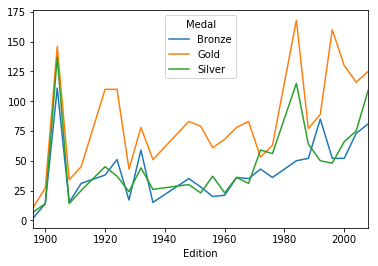

In [0]:
# Plot the DataFrame usa_medals_by_year
usa_medals_by_year.plot()
plt.show()

**Visualizing USA Medal Counts by Edition: Area Plot**

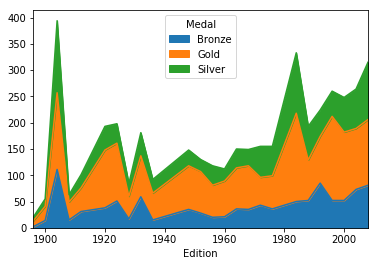

In [0]:
# Create an area plot of usa_medals_by_year
usa_medals_by_year.plot.area()
plt.show()

**Visualizing USA Medal Counts by Edition: Area Plot with Ordered Medals**

You may have noticed that the medals are ordered according to a lexicographic (dictionary) ordering: Bronze < Gold < Silver. However, you would prefer an ordering consistent with the Olympic rules: Bronze < Silver < Gold.

In [0]:
# Redefine 'Medal' as an ordered categorical
medals.Medal = pd.Categorical(values = medals.Medal,categories=['Bronze', 'Silver', 'Gold'],ordered=True)

In [0]:
# Create the DataFrame: usa
usa = medals[medals.NOC == 'USA']

In [0]:
# Group usa by 'Edition', 'Medal', and 'Athlete'
usa_medals_by_year = usa.groupby(['Edition', 'Medal'])['Athlete'].count()

In [0]:
# Reshape usa_medals_by_year by unstacking
usa_medals_by_year = usa_medals_by_year.unstack(level='Medal')

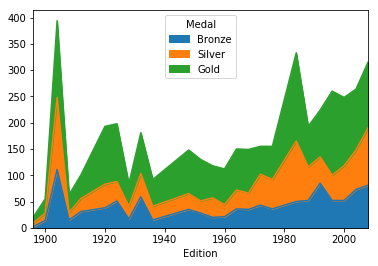

In [0]:
# Create an area plot of usa_medals_by_year
usa_medals_by_year.plot.area()
plt.show()